# <img style="float: left; padding-right: 10px; width: 200px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/assets/media/logo.png"> EPA-1316 Introduction to *Urban* Data Science 


## Homework 1: Data, Grammar and Engineering

**TU Delft**<br>
**Q1 2022**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Auriane Técourt, Dorukhan Yeşilli, Ludovica Bindi, Nicolò Canal, Ruth Nelson, Vaibhavi Srivastava <br>
**[Centre for Urban Science & Policy]( https://cusp.tbm.tudelft.nl/)** <br>

---



# Homework exercises to work on your own

## Exercise 1

Practice your data tidying skills with a different dataset. For example, you can have a look at the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

And its structure is as follows:

In [1]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1'
IFrame(url, 700, 400)

Follow these steps:

* Download the table as a `csv` file (File --> Download as --> .csv, current sheet).
* Read it into Python.
* Explore it by creating a few plots.
* Examine its level of tidiness and turn it into a fully tidy dataset.
* Obtain a monthly total count of casualties and create a line or a bar plot of them.


In [1]:
# your code here
# use many cells if you like to structure your code well
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
data_source = pd.read_csv('Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv',header=1)
data_source = data_source.iloc[:-1]
data_source = data_source.replace(np.nan, 0)
data_source['Taliban'] = data_source['Taliban'].astype(int)
data_source['Civilians'] = data_source['Civilians'].astype(int)
data_source['Afghan forces'] = data_source['Afghan forces'].astype(int)
data_source['Nato (detailed in spreadsheet)'] = data_source['Nato (detailed in spreadsheet)'].astype(int)
data_source['Nato - official figures'] = data_source['Nato - official figures'].astype(int)

data_source.set_index(['Year','Month'],inplace=True)
print(data_source.head)


<bound method NDFrame.head of                   Taliban  Civilians  Afghan forces  \
Year   Month                                          
2004.0 January         15         51             23   
       February         0          7              4   
       March           19          2              0   
       April            5          3             19   
       May             18         29             56   
...                   ...        ...            ...   
2009.0 August         445        206            190   
       September      614        197            133   
       October        462        107             86   
       November       410        120             69   
       December       287         87             65   

                  Nato (detailed in spreadsheet)  Nato - official figures  
Year   Month                                                               
2004.0 January                                 0                       11  
       February           

In [47]:
#cols = ['Taliban']
#data_source_tidy = data_source.loc[:cols]
#data_source_tidy['monthly_total'] = data_source_tidy.sum(axis=1,numeric_only= True)
#print(data_source_tidy)
#total = data_source_tidy['Taliban']+data_source_tidy['Civilians']+data_source_tidy['Afghan forces']+data_source_tidy['Nato (detailed in spreadsheet)']+data_source_tidy['Nato - official figures']
#print(data_source['Taliban'],data_source_tidy['Civilians'],data_source_tidy['Afghan forces'],data_source_tidy['Nato (detailed in spreadsheet)'],data_source_tidy['Nato - official figures'])

grouped = data_source
grouped['Total'] = grouped.sum(axis=1)
grouped = grouped.reset_index()
#grouped.set_index('Year',inplace=True)
print(grouped.head)
print(grouped['Total'])

<bound method NDFrame.head of       Year      Month  Taliban  Civilians  Afghan forces  \
0   2004.0    January       15         51             23   
1   2004.0   February        0          7              4   
2   2004.0      March       19          2              0   
3   2004.0      April        5          3             19   
4   2004.0        May       18         29             56   
..     ...        ...      ...        ...            ...   
67  2009.0     August      445        206            190   
68  2009.0  September      614        197            133   
69  2009.0    October      462        107             86   
70  2009.0   November      410        120             69   
71  2009.0   December      287         87             65   

    Nato (detailed in spreadsheet)  Nato - official figures  Total  
0                                0                       11    700  
1                                5                        2    126  
2                                2        

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


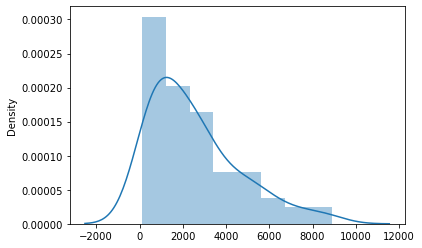

In [60]:
#_ = sns.kdeplot(data_source['Civilians'], shade=True)
_ = sns.distplot(x=grouped['Total'])

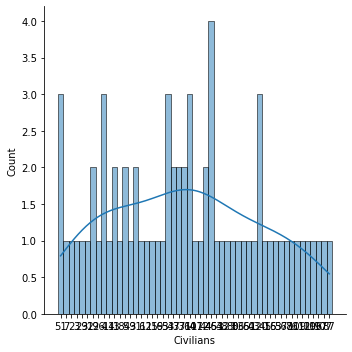

In [26]:
sns.displot(data=data_source_tidy, x=data_source_tidy['Civilians'], kde=True)